<a href="https://colab.research.google.com/github/jocelynbaduria/cmpe-257_Machine_Learning/blob/main/%5BJocelyn_Baduria%5D_HW5_HPO_257_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Wrangling

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.1 Import Libraries and Read the Data from CSV

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import matplotlib as mpl
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [5]:
path = '/content/drive/My Drive/Underdog/data/Diameter_Asteroid_data.csv'

data = pd.read_csv(path, delimiter=',')
# data1 = pd.read_csv(io.StringIO(data.to_csv(index=False)))

In [6]:
data.head()

,name,diameter,rot_per,Clustered3
0,Agathe,9.300,6.4840,4
1,Augusta,12.467,5.8949,1
2,Valda,14.645,17.3860,1
3,Lucretia,11.036,4.3480,1
4,Bruna,9.822,13.8070,3


# 1.2 Data Preparation 

In [7]:
# data.drop(['Clustered3'], axis=1, inplace=True)
data = data.rename(columns={"Clustered3": "category"})

In [8]:
data.shape

(3051, 4)

In [9]:
data.head()

,name,diameter,rot_per,category
0,Agathe,9.300,6.4840,4
1,Augusta,12.467,5.8949,1
2,Valda,14.645,17.3860,1
3,Lucretia,11.036,4.3480,1
4,Bruna,9.822,13.8070,3


In [10]:
# data.round(1)

## Convert the diameter and rotation period data to Int

In [11]:
data['diameter'] = data['diameter'].astype(int) 
data['rot_per'] = data['rot_per'].astype(int) 

In [12]:
data.dtypes

name        object
diameter     int64
rot_per      int64
category     int64
dtype: object

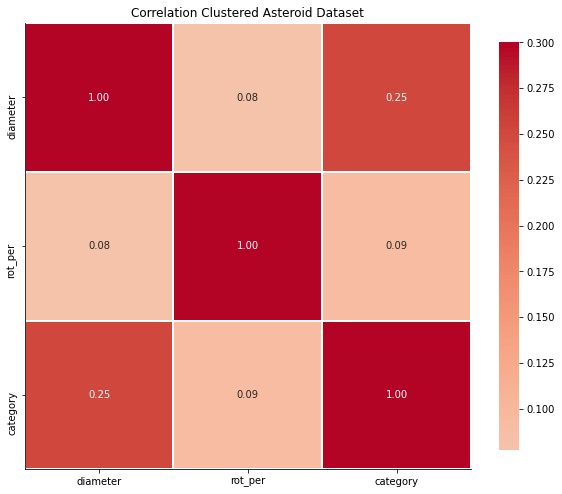

In [13]:
corr = data.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(10,15)
plt.title('Correlation Clustered Asteroid Dataset')
plt.show()

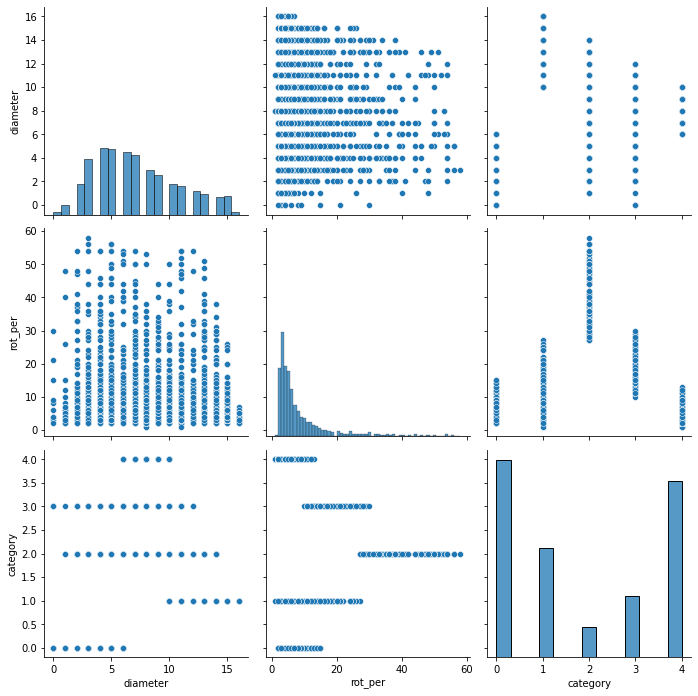

In [14]:
g = sns.pairplot(data, diag_kind="hist")
g.fig.set_size_inches(10,10)

# 2. HPO Muller Loop Classification

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['name'] = le.fit_transform(data['name'])

In [16]:
data['name']

0         31
1        183
2       2787
3       1601
4        382
        ... 
3046     410
3047    2855
3048    2196
3049      34
3050    1561
Name: name, Length: 3051, dtype: int64

In [17]:
X = data[['name','diameter', 'rot_per']]
y = data['category']

In [18]:
X

,name,diameter,rot_per
0,31,9,6
1,183,12,5
2,2787,14,17
3,1601,11,4
4,382,9,13
...,...,...,...
3046,410,1,3
3047,2855,4,8
3048,2196,1,7
3049,34,0,21


In [19]:
# Scaling the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

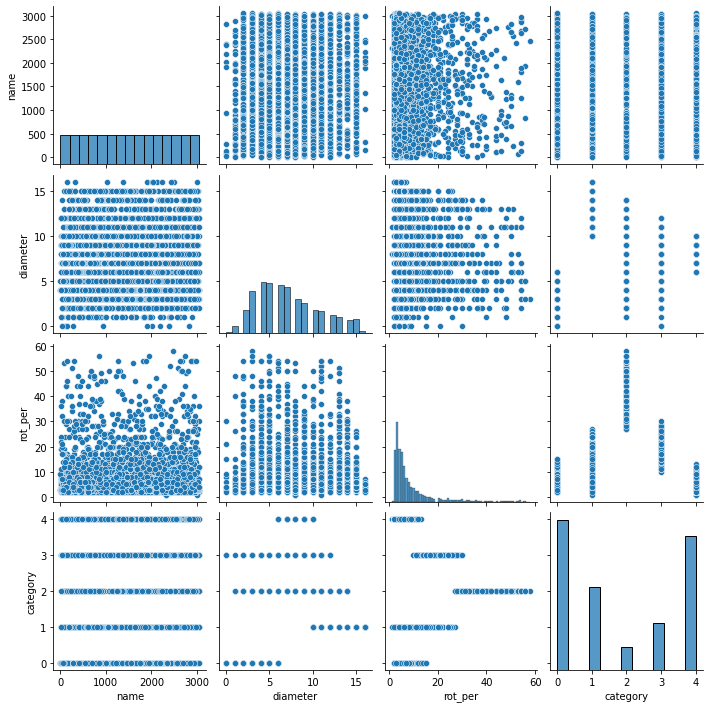

In [20]:
g = sns.pairplot(data[['name','diameter', 'rot_per','category']], diag_kind="hist")
g.fig.set_size_inches(10,10)

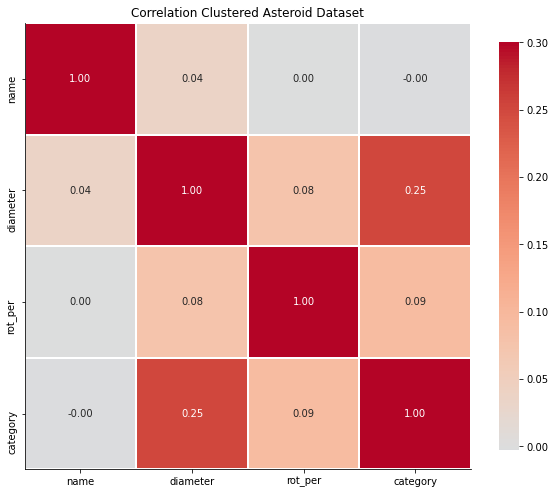

In [21]:
corr = data[['name','diameter', 'rot_per','category']].corr()
g = sns.heatmap(corr,  vmax=.3, center=0,square=True, linewidths=1, cbar_kws={"shrink": 0.5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(10,15)
plt.title('Correlation Clustered Asteroid Dataset')
plt.show()

## 2.1 DecisionTreeClassifier(max_depth=5)
##     MLPClassifier(solver='adam',alpha=1, max_iter=1000)
Data Narrative: Classification Accuracy above 95%
MLP got the highest accuracy of 96.39

In [32]:
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

accuracy:   0.969
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       306
           1       0.97      0.94      0.96       186
           2       0.98      1.00      0.99        47
           3       0.91      0.98      0.94       103
           4       0.96      0.97      0.97       274

    accuracy                           0.97       916
   macro avg       0.96      0.97      0.97       916
weighted avg       0.97      0.97      0.97       916

Classifier = Decision Tree, Score (test, accuracy) = 0.97
accuracy:   0.980
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       306
           1       0.99      0.97      0.98       186
           2       1.00      0.98      0.99        47
           3       0.99      0.96      0.98       103
           4       0.95      0.99      0.97       274

    accuracy                           0.98       916
   macro avg       0.99      0.98    

,classifier,mae,mse,Rsquared,accuracy
0,Decision Tree,0.08,0.25,0.91,0.969432
1,MLP Neural Net,0.06,0.18,0.94,0.980349


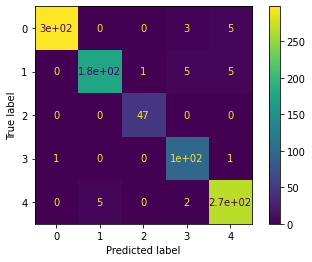

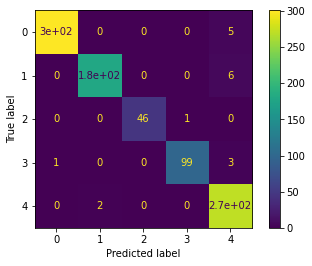

In [33]:
X = data[['name','diameter', 'rot_per']]
y = data['category']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

names = ["Decision Tree", "MLP Neural Net"]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(solver='adam',alpha=1, max_iter=1000)
    ]
output = pd.DataFrame(columns=['classifier','mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):
    # start_time = time()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)

    # score = 100.0 * clf.score(X_test, y_test)

    score = metrics.accuracy_score(y_test, y_predict)
    print("accuracy:   %0.3f" % score)
    print(metrics.classification_report(y_test, y_predict))
    plot_confusion_matrix(clf, X_test, y_test) 
  
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name,'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
   
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
display(output)

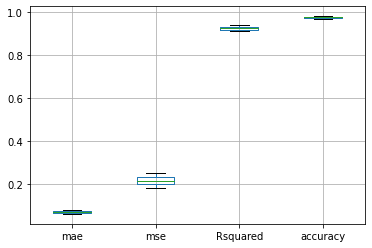

In [34]:
output.boxplot()

## 2.2 DecisionTreeClassifier(max_depth=6),
##     MLPClassifier(solver='sgd',alpha=1, max_iter=1000)
Data Narrative: Classification Accuracy above 95%
Decision Tree got the highest accuracy of 97.27

accuracy:   0.966
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       308
           1       0.97      0.93      0.95       168
           2       1.00      0.96      0.98        45
           3       0.87      0.96      0.91        94
           4       0.97      0.97      0.97       301

    accuracy                           0.97       916
   macro avg       0.96      0.96      0.96       916
weighted avg       0.97      0.97      0.97       916

Classifier = Decision Tree, Score (test, accuracy) = 0.97
accuracy:   0.971
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       308
           1       0.97      0.96      0.97       168
           2       0.95      0.93      0.94        45
           3       0.96      0.87      0.92        94
           4       0.96      0.99      0.97       301

    accuracy                           0.97       916
   macro avg       0.97      0.95    

,classifier,mae,mse,Rsquared,accuracy
0,Decision Tree,0.08,0.22,0.92,0.966157
1,MLP Neural Net,0.07,0.19,0.94,0.970524


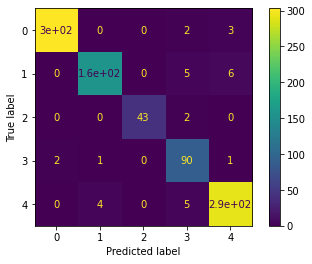

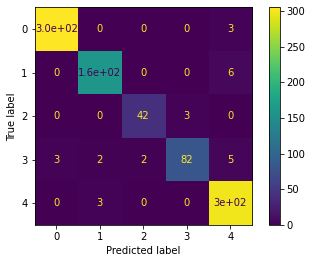

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

names = ["Decision Tree", "MLP Neural Net"]

classifiers = [
    DecisionTreeClassifier(max_depth=6),
    MLPClassifier(solver='sgd',alpha=1, max_iter=1000)
    ]
output = pd.DataFrame(columns=['classifier', 'mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):
    # start_time = time()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    # score = 100.0 * clf.score(X_test, y_test)

    score = metrics.accuracy_score(y_test, y_predict)
    print("accuracy:   %0.3f" % score)
    print(metrics.classification_report(y_test, y_predict))
    plot_confusion_matrix(clf, X_test, y_test) 

    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
  
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

display(output)

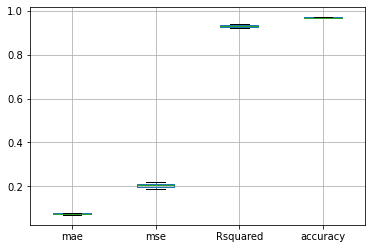

In [37]:
output.boxplot()

## 2.3 DecisionTreeClassifier(max_depth=7),
##     MLPClassifier(solver='lbfgs',alpha=1, max_iter=1000)
Data Narrative: Classification Accuracy above 95%. MLP got the highest accuracy of 97.37%

accuracy:   0.964
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       315
           1       0.99      0.94      0.96       173
           2       0.98      1.00      0.99        53
           3       0.87      0.95      0.91        93
           4       0.95      0.98      0.97       282

    accuracy                           0.96       916
   macro avg       0.96      0.97      0.96       916
weighted avg       0.97      0.96      0.96       916

Classifier = Decision Tree, Score (test, accuracy) = 0.96
accuracy:   0.969
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       315
           1       0.98      0.94      0.96       173
           2       1.00      0.98      0.99        53
           3       0.96      0.95      0.95        93
           4       0.94      1.00      0.97       282

    accuracy                           0.97       916
   macro avg       0.97      0.97    

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,classifier,mae,mse,Rsquared,accuracy
0,Decision Tree,0.10,0.30,0.9,0.963974
1,MLP Neural Net,0.09,0.29,0.9,0.969432


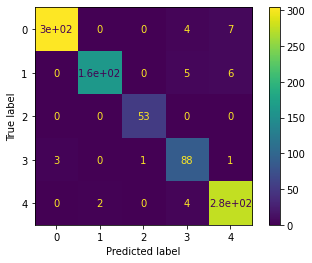

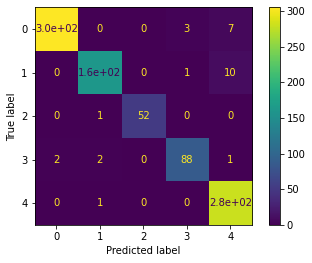

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

names = ["Decision Tree", "MLP Neural Net"]

classifiers = [
    DecisionTreeClassifier(max_depth=6),
    MLPClassifier(solver='lbfgs',alpha=1, max_iter=1000)
    ]
output = pd.DataFrame(columns=['classifier', 'mae', 'mse', 'Rsquared', 'accuracy'])

max_score = 0.0
max_class = ''
# iterate over classifiers

for name, clf in zip(names, classifiers):
    # start_time = time()
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    # score = 100.0 * clf.score(X_test, y_test)

    score = metrics.accuracy_score(y_test, y_predict)
    print("accuracy:   %0.3f" % score)
    print(metrics.classification_report(y_test, y_predict))
    plot_confusion_matrix(clf, X_test, y_test) 

    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'classifier': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)
  
    print('Classifier = %s, Score (test, accuracy) = %.2f' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

display(output)

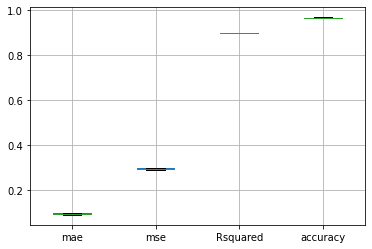

In [39]:
output.boxplot()

# 3. Using Autogloun Classification 

In [ ]:
# Uninstall mkl for faster neural-network training time
!pip uninstall -y mkl
# Upgrade pip to ensure the latest package versions are available
!pip install -U pip
!pip install -U "mxnet<2.0.0"
!pip install autogluon
!pip install -U ipykernel

Uninstalling mkl-2019.0:
  Successfully uninstalled mkl-2019.0
     |████████████████████████████████| 1.5MB 8.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 54.7 MB 8.5 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 230 kB 8.7 MB/s 
     |████████████████████████████████| 311 kB 8.3 MB/s 
     |████████████████████████████████| 48 kB 6.7 MB/s 
     |████████████████████████████████| 48 kB 6.1 MB/s 
     |████████████████████████████████| 130 kB 16.8 MB/s 
     |████████████████████████████████| 675 kB 16.6 MB/s 
     |████████████████████████████████| 25.9 MB 89.3 MB/s 
     |████████████████████████████████| 950 kB 81.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
 

     |████████████████████████████████| 120 kB 8.4 MB/s 
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 5.5.0 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
path = '/content/drive/My Drive/Underdog/data/Diameter_Asteroid_data.csv'
# data = pd.read_csv(path, delimiter=',')

In [ ]:
train_data = TabularDataset(path)
subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
train_data.head()

Loaded data from: /content/drive/My Drive/Underdog/data/Diameter_Asteroid_data.csv | Columns = 4 / 4 | Rows = 3051 -> 3051


,name,diameter,rot_per,Clustered3
453,Marietta,15.677,5.488,1
1880,Aktsynovia,8.854,4.123,4
2796,Sikhote-Alin,4.272,20.750,3
2198,Tanuki,4.061,2.886,0
3049,Agni,0.462,21.990,3


In [ ]:
label = 'Clustered3'
print("Summary of class variable: \n", train_data[label].describe())

Summary of class variable: 
 count    500.000000
mean       1.736000
std        1.702969
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max        4.000000
Name: Clustered3, dtype: float64


In [ ]:
save_path = '/content/drive/My Drive/Underdog/data/trained_Diameter_Asteroid_data.csv'  # specifies folder to store trained models
predictor = TabularPredictor(label=label, path=save_path).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "/content/drive/My Drive/Underdog/data/trained_Diameter_Asteroid_data.csv/"
AutoGluon Version:  0.1.0
Train Data Rows:    500
Train Data Columns: 3
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [1, 4, 3, 0, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12434.35 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators

	1.0	 = Validation accuracy score
	3.88s	 = Training runtime
	0.06s	 = Validation runtime
Fitting model: KNeighborsUnif ...
	0.96	 = Validation accuracy score
	0.0s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: KNeighborsDist ...
	0.96	 = Validation accuracy score
	0.0s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.97	 = Validation accuracy score
	0.73s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.97	 = Validation accuracy score
	0.73s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.99	 = Validation accuracy score
	0.64s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.99	 = Validation accuracy score
	0.63s	 = Training runtime
	0.1s	 = Validation runtime
Fitting model: LightGBM ...
	0.99	 = Validation accuracy score
	0.37s	 = Training runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMXT ...
	0.97	 = Validat

Fitting model: WeightedEnsemble_L2 ...
	1.0	 = Validation accuracy score
	0.31s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 15.37s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/content/drive/My Drive/Underdog/data/trained_Diameter_Asteroid_data.csv/")


In [ ]:
test_data = TabularDataset(path)
y_test = test_data[label]  # values to predict
test_data_nolab = test_data.drop(columns=[label])  # delete label column to prove we're not cheating
test_data_nolab.head()

Loaded data from: /content/drive/My Drive/Underdog/data/Diameter_Asteroid_data.csv | Columns = 4 / 4 | Rows = 3051 -> 3051


,name,diameter,rot_per
0,Agathe,9.300,6.4840
1,Augusta,12.467,5.8949
2,Valda,14.645,17.3860
3,Lucretia,11.036,4.3480
4,Bruna,9.822,13.8070


In [ ]:
predictor = TabularPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.9619796787938381
Evaluations on test data:
{
    "accuracy": 0.9619796787938381,
    "accuracy_score": 0.9619796787938381,
    "balanced_accuracy_score": 0.9330503048177079,
    "matthews_corrcoef": 0.9484674199439911
}
Detailed (per-class) classification report:
{
    "0": {
        "precision": 0.9577594123048668,
        "recall": 0.9980861244019139,
        "f1-score": 0.9775070290534208,
        "support": 1045
    },
    "1": {
        "precision": 0.9539249146757679,
        "recall": 0.9621342512908778,
        "f1-score": 0.9580119965724079,
        "support": 581
    },
    "2": {
        "precision": 0.9931506849315068,
        "recall": 0.8895705521472392,
        "f1-score": 0.9385113268608415,
        "support": 163
    },
    "3": {
        "precision": 0.9351535836177475,
        "recall": 0.8379204892966361,
        "f1-score": 0.8838709677419355,
        "support": 327
    },
    "4": {
        "precision": 0.9754535752401281,
    

Predictions:  
 0       4
1       1
2       1
3       1
4       3
       ..
3046    0
3047    0
3048    0
3049    3
3050    3
Name: Clustered3, Length: 3051, dtype: int64


In [ ]:
pred_probs = predictor.predict_proba(test_data_nolab)
pred_probs.head(5)

,0,1,2,3,4
0,0.091605,0.098407,0.091836,0.100705,0.617447
1,0.096895,0.597961,0.097396,0.097083,0.110666
2,0.130957,0.397646,0.195335,0.145347,0.130715
3,0.116360,0.424214,0.117008,0.118289,0.224128
4,0.127911,0.153656,0.152955,0.309189,0.256289


In [ ]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              CatBoost       0.99       0.001653   0.419576                0.001653           0.419576            1       True         11
1   WeightedEnsemble_L2       0.99       0.002135   0.715739                0.000482           0.296163            2       True         14
2              LightGBM       0.99       0.003138   0.388790                0.003138           0.388790            1       True          9
3        NeuralNetMXNet       0.99       0.008195   4.123319                0.008195           4.123319            1       True          1
4        ExtraTreesEntr       0.99       0.102065   0.629346                0.102065           0.629346            1       True          8
5        ExtraTreesGini       0.99       0.102068   0.532774                0.102068           0.532774 

In [ ]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  multiclass
AutoGluon identified the following types of features:
('float', []) : 2 | ['diameter', 'rot_per']


In [ ]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr,0.978040,0.99,0.226420,0.102065,0.629346,0.226420,0.102065,0.629346,1,True,8
1,ExtraTreesGini,0.978040,0.99,0.232523,0.102068,0.532774,0.232523,0.102068,0.532774,1,True,7
2,RandomForestGini,0.976073,0.97,0.215852,0.101945,0.728580,0.215852,0.101945,0.728580,1,True,5
3,RandomForestEntr,0.974107,0.97,0.216104,0.101997,0.736539,0.216104,0.101997,0.736539,1,True,6
4,LightGBM,0.972140,0.99,0.037225,0.003138,0.388790,0.037225,0.003138,0.388790,1,True,9
5,LightGBMLarge,0.971157,0.98,0.085430,0.004406,0.669798,0.085430,0.004406,0.669798,1,True,13
6,XGBoost,0.970829,0.98,0.045021,0.003443,0.190469,0.045021,0.003443,0.190469,1,True,12
7,NeuralNetMXNet,0.968863,0.99,0.098037,0.008195,4.123319,0.098037,0.008195,4.123319,1,True,1
8,LightGBMXT,0.963618,0.97,0.128933,0.005647,0.358752,0.128933,0.005647,0.358752,1,True,10
9,CatBoost,0.961980,0.99,0.006567,0.001653,0.419576,0.006567,0.001653,0.419576,1,True,11


In [ ]:
predictor.predict(test_data, model='RandomForestGini')

0       4
1       1
2       1
3       1
4       3
       ..
3046    0
3047    0
3048    0
3049    3
3050    3
Name: Clustered3, Length: 3051, dtype: int64

In [ ]:
predictor.predict(test_data, model='RandomForestEntr')

0       4
1       1
2       1
3       1
4       3
       ..
3046    0
3047    0
3048    0
3049    3
3050    3
Name: Clustered3, Length: 3051, dtype: int64

## Maximizing predictive performance

In [ ]:
time_limit = 60  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)
metric = 'mean_absolute_error'  # specify your evaluation metric here
predictor = TabularPredictor(label, eval_metric=metric).fit(train_data, time_limit=time_limit, presets='best_quality')
predictor.leaderboard(test_data, silent=True)

No path specified. Models will be saved in: "AutogluonModels/ag-20210309_021336/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20210309_021336/"
AutoGluon Version:  0.1.0
Train Data Rows:    500
Train Data Columns: 3
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [1, 4, 3, 0, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12434.53 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values

		Expected output and target to have the same number of elements but got 500 and 100.
Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autogluon/tabular/trainer/abstract_trainer.py", line 911, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autogluon/tabular/trainer/abstract_trainer.py", line 881, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 405, in fit
    self._fit(**kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 216, in _fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=

[02:14:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:14:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:14:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:14:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

	-0.056	 = Validation mean_absolute_error score
	1.33s	 = Training runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 20.65s of the 20.65s of remaining time.
	-0.064	 = Validation mean_absolute_error score
	3.58s	 = Training runtime
	0.02s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 59.89s of the 16.69s of remaining time.
	-0.036	 = Validation mean_absolute_error score
	0.38s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 43.71s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20210309_021336/")


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesEntr_BAG_L1,-0.043265,-0.068,0.963855,0.508642,2.866100,0.963855,0.508642,2.866100,1,True,7
1,ExtraTreesGini_BAG_L1,-0.043265,-0.068,1.063426,0.508026,2.675173,1.063426,0.508026,2.675173,1,True,6
2,NeuralNetMXNet_BAG_L1,-0.045559,-0.364,0.407245,0.038619,11.628832,0.407245,0.038619,11.628832,1,True,1
3,RandomForestEntr_BAG_L1,-0.047853,-0.052,1.049634,0.508245,3.612072,1.049634,0.508245,3.612072,1,True,5
4,RandomForestGini_BAG_L1,-0.048509,-0.052,1.048021,0.508188,3.620506,1.048021,0.508188,3.620506,1,True,4
5,WeightedEnsemble_L2,-0.050803,-0.036,1.092325,0.512386,7.036704,0.002784,0.000466,0.384745,2,True,13
6,LightGBMXT_BAG_L1,-0.051786,-0.062,0.508991,0.023456,2.745361,0.508991,0.023456,2.745361,1,True,9
7,LightGBM_BAG_L1,-0.052114,-0.056,0.256173,0.016028,2.604527,0.256173,0.016028,2.604527,1,True,8
8,XGBoost_BAG_L1,-0.053753,-0.056,0.235775,0.012284,1.333790,0.235775,0.012284,1.333790,1,True,11
9,LightGBMLarge_BAG_L1,-0.056703,-0.064,0.376414,0.019254,3.579384,0.376414,0.019254,3.579384,1,True,12


In [ ]:
time_limit = 60  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)
metric = 'mean_squared_error'  # specify your evaluation metric here
predictor = TabularPredictor(label, eval_metric=metric).fit(train_data, time_limit=time_limit, presets='best_quality')
predictor.leaderboard(test_data, silent=True)

No path specified. Models will be saved in: "AutogluonModels/ag-20210309_021210/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 60s
AutoGluon will save models to "AutogluonModels/ag-20210309_021210/"
AutoGluon Version:  0.1.0
Train Data Rows:    500
Train Data Columns: 3
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [1, 4, 3, 0, 2]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12424.05 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values

		Expected output and target to have the same number of elements but got 500 and 100.
Detailed Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autogluon/tabular/trainer/abstract_trainer.py", line 911, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autogluon/tabular/trainer/abstract_trainer.py", line 881, in _train_single
    model.fit(X=X, y=y, **model_fit_kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autogluon/core/models/abstract/abstract_model.py", line 405, in fit
    self._fit(**kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 142, in _fit
    super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 216, in _fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=

[02:12:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:12:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:12:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:12:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

	-0.144	 = Validation mean_squared_error score
	1.33s	 = Training runtime
	0.02s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 19.52s of the 19.52s of remaining time.
	-0.188	 = Validation mean_squared_error score
	3.63s	 = Training runtime
	0.02s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 59.89s of the 15.5s of remaining time.
	-0.088	 = Validation mean_squared_error score
	0.38s	 = Training runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 44.89s ...
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20210309_021210/")


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetMXNet_BAG_L1,-0.109472,-1.778,0.416027,0.038669,13.215127,0.416027,0.038669,13.215127,1,True,1
1,ExtraTreesGini_BAG_L1,-0.112094,-0.204,0.966699,0.508420,2.676616,0.966699,0.508420,2.676616,1,True,6
2,ExtraTreesEntr_BAG_L1,-0.117339,-0.204,0.970702,0.508191,2.865288,0.970702,0.508191,2.865288,1,True,7
3,RandomForestGini_BAG_L1,-0.124549,-0.120,1.057098,0.508172,3.508025,1.057098,0.508172,3.508025,1,True,4
4,RandomForestEntr_BAG_L1,-0.125533,-0.120,0.950948,0.507935,3.501137,0.950948,0.507935,3.501137,1,True,5
5,LightGBM_BAG_L1,-0.131432,-0.156,0.255788,0.016624,2.641274,0.255788,0.016624,2.641274,1,True,8
6,WeightedEnsemble_L2,-0.132416,-0.088,0.445189,0.043529,17.580544,0.003078,0.000511,0.377047,2,True,13
7,XGBoost_BAG_L1,-0.138971,-0.144,0.259155,0.019141,1.325225,0.259155,0.019141,1.325225,1,True,11
8,LightGBMLarge_BAG_L1,-0.141265,-0.188,0.383774,0.019693,3.631752,0.383774,0.019693,3.631752,1,True,12
9,CatBoost_BAG_L1,-0.154703,-0.090,0.026085,0.004349,3.988369,0.026085,0.004349,3.988369,1,True,10


# Conclusion

Conclusion : Using Tabular Classification in Autogloun with MAE, MSE metric resulted to negative score test, while Accuracy test have almost the same result with the scikit learn above 92%. Scikit Learn MLPclassifier with highest accuracy and Extratrees gini got the highest accuracy for Autogloun.